In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

title_size = 14

# **Data Analysis of RecommendationCount, IsFree, and FreeVerAvail**

# **Data Cleaning**

**Load in the csv file and leave relevant columns**

**RecommendationCount** - int, Number of people who recommended the game

**IsFree** - bool, True if the game is free, False otherwise

**FreeVerAvail** - bool, True if the game has a free version available, False otherwise

**SteamSpyOwners** - int, Number of people who own the game

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/COGS108/group036_fa20/master/Datasets/games-features.csv?token=AFASGDG236VMGHN44GU6Z4K72JSFU')

**Drop games that have not been released**

**Add log owners column**

In [3]:
df = df[df['SteamSpyOwners'] > 0]

df['SteamSpyOwnersLog'] = np.log(df['SteamSpyOwners'])

# **Recommendation Count Univariate Analysis**

**Distribution of RecommendationCount**

We visualized the distribution of RecommendationCount to see how many games were highly recommended. From our plot, we found that while many games had a decent amount of recommendations (bins 0.0-0.06), we can see that there are outliers that have drastically more recommendations than the other games. 

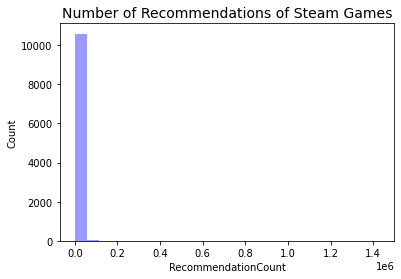

In [4]:
sns.distplot(df['RecommendationCount'], bins=25, kde=False, color='blue')
plt.title('Number of Recommendations of Steam Games', fontsize = title_size)
plt.xlabel('RecommendationCount')
plt.ylabel('Count')
plt.show()

**Drop games with 0 RecommendationCount**

This will allow us to take the log of RecommendationCount, whose distribution we'll be using for analysis. 

**Create column of the log transformation of RecommendationCount**

**RecommendationCountLog** - float, natural log transformation of RecommendationCount

In [5]:
recommendation_log_df = df[df['RecommendationCount'] > 0]
recommendation_log_df['RecommendationCountLog'] = np.log(recommendation_log_df['RecommendationCount'])

**Distribution of RecommendationCountLog**

We visualized the log distribution of RecommendationCount to get a better understanding of how distributed the games are. From the plot, we found that the distribution is heavily right skewed, with many games having low amounts of recommendations. However, we can now see the distribution much better than when we looked at the raw distribution of recommendations. 

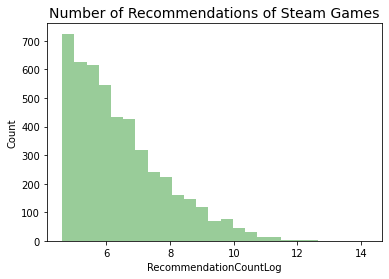

In [6]:
sns.distplot(recommendation_log_df['RecommendationCountLog'], bins=25, kde=False, color='green')
plt.title('Number of Recommendations of Steam Games', fontsize = title_size)
plt.xlabel('RecommendationCountLog')
plt.ylabel('Count')
plt.show()

# **RecommendationCountLog In Relation To SteamSpyOwnersLog**

We created a scatter plot to show the relationship between the logarithmic transformation of RecommendationCount and SteamSpyOwners and how they change as one increases. 

**More Recommendations and More Owners**

In the plot, we found that there is a positive correlation between the log of RecommendationCount and the log of SteamSpyOwners. This means that for games with more owners, the game will have more recommendations, and vice versa. 

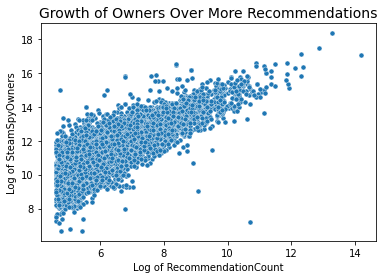

In [7]:
sns.scatterplot(x='RecommendationCountLog', y='SteamSpyOwnersLog', data=recommendation_log_df, s=25)
plt.title('Growth of Owners Over More Recommendations', fontsize=title_size)
plt.xlabel('Log of RecommendationCount')
plt.ylabel('Log of SteamSpyOwners')
plt.show()

# **IsFree In Relation to SteamSpyOwnersLog**

We created a box plot of the number of owners split between whether the game was free or not to show the relationship between whether a game was free and the number of owners the game had. 

From the boxplots, we found that games that were free were generally more popular, with more owners, than games that weren't free. In both free and non-free games, there were a number of outliers, both above and below the middle 50% of the data. The median log of SteamSpyOwners of both categories is 11.8 for free games, which is around 135,000 owners, and 9.632 for non-free games, which is around 15,000 owners.  

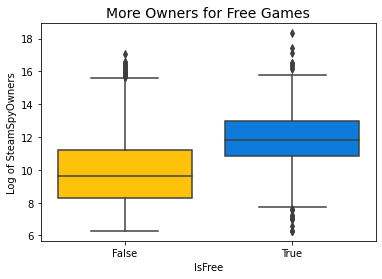

In [8]:
ax = sns.boxplot(x='IsFree', y='SteamSpyOwnersLog', data=df)
plt.title('More Owners for Free Games', fontsize=title_size)
plt.xlabel('IsFree')
plt.ylabel('Log of SteamSpyOwners')
ax.artists[0].set_facecolor('#FFC20A')
ax.artists[1].set_facecolor('#0C7BDC')
plt.show()

# **FreeVerAvail In Relation To SteamSpyOwnersLog**

We created a box plot of the number of owners split between whether the game had a free version or not to show the relationship between whether a free version of a game was available or not and the number of owners the game had. 

From the plot, we found that the games with a free version generally had more owners than games without. However, more than 25% of games without a free version had more owners than most of the games with a free version. The median of log owners for games with a free version is around 12.58, which is about 292,500 owners. The median for log owners for games without a free version is around 9.8, or 18,000 owners. There are also a number of outliers that have a significant amount of owners for games that don't have a free version available. 

We can see that having a free version available isn't always associated with high popularity, as games with no free versions have a much larger range of number of owners. 

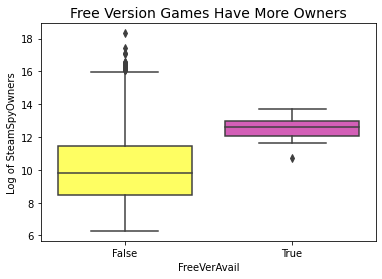

In [9]:
ax = sns.boxplot(x='FreeVerAvail', y='SteamSpyOwnersLog', data=df)
plt.title('Free Version Games Have More Owners', fontsize=title_size)
plt.xlabel('FreeVerAvail')
plt.ylabel('Log of SteamSpyOwners')
ax.artists[0].set_facecolor('#FEFE62')
ax.artists[1].set_facecolor('#D35FB7')
plt.show()